# importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,confusion_matrix,classification_report


# Problem statement : to train a classification model on survivals of Titanic travelers

## Data Gathering

In [3]:
df = pd.read_csv('titanic.csv')
df  

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.392817,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.504490,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,4.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.PassengerId.nunique() 

891

In [11]:
df.Survived.unique() 

array([0, 1, 2, 4], dtype=int64)

In [13]:
df.loc[(df['Survived']==2)|(df['Survived']==4)] 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,2,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
26,27,4,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

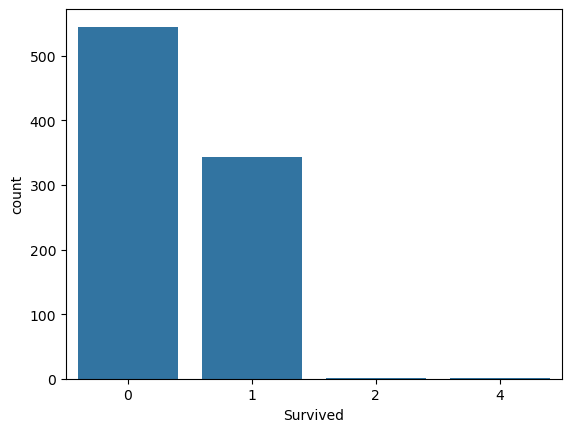

In [15]:
sns.countplot(x='Survived',data=df) 

<Axes: xlabel='Survived', ylabel='count'>

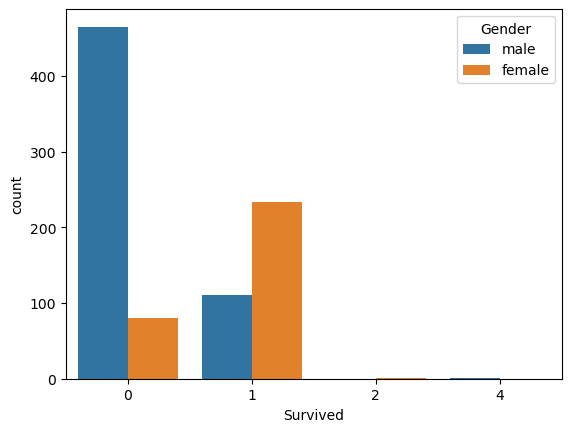

In [16]:
sns.countplot(x='Survived',hue='Gender',data=df) 

<Axes: xlabel='Survived', ylabel='count'>

C:\Users\abcd\AppData\Local\Temp\ipykernel_15632\263188332.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:Blue'` for the same effect.

  display(sns.countplot(x='Survived',hue='Gender',data=df,color='Blue'))


<Axes: xlabel='Survived', ylabel='count'>

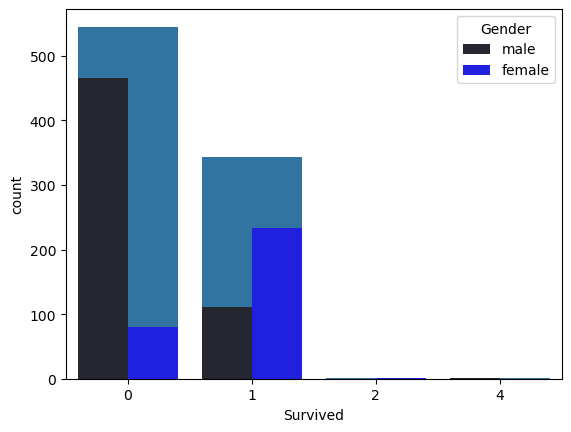

In [18]:
display(sns.countplot(x='Survived',data=df))
display(sns.countplot(x='Survived',hue='Gender',data=df,color='Blue')) 

In [21]:
df['Survived'].replace({2:1,4:0},inplace=True)  

C:\Users\abcd\AppData\Local\Temp\ipykernel_15632\3168691769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Survived'].replace({2:1,4:0},inplace=True)


In [23]:
df.Survived.unique() 

array([0, 1], dtype=int64)

<Axes: xlabel='Pclass', ylabel='count'>

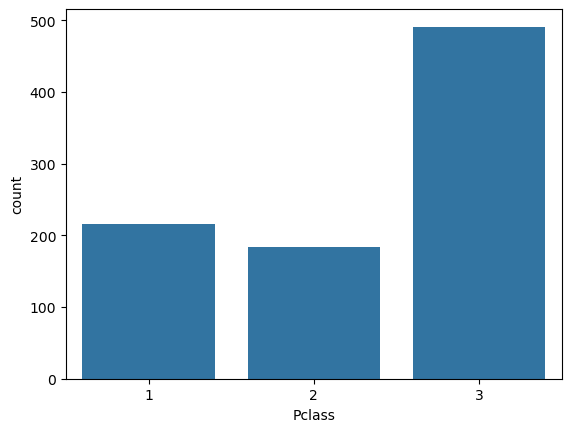

In [14]:
sns.countplot(x='Pclass',data=df)  

<Axes: xlabel='Pclass', ylabel='count'>

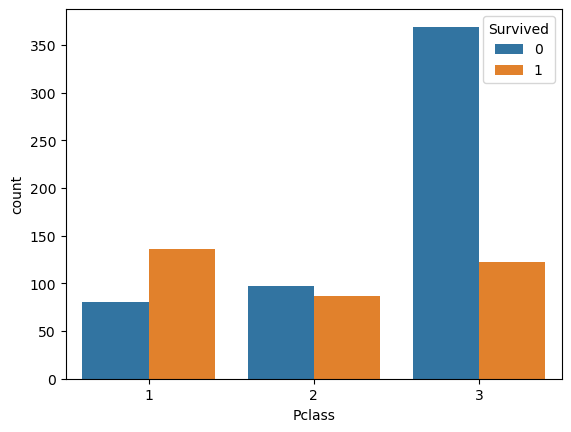

In [15]:
sns.countplot(x='Pclass',hue='Survived',data=df) 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

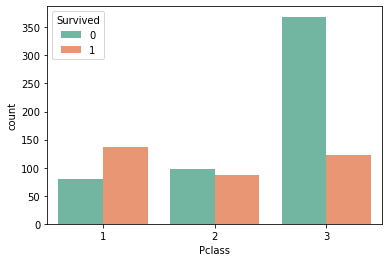

In [15]:
sns.countplot(x='Pclass',hue='Survived',data=df,palette='Set2')

<Axes: xlabel='Fare'>

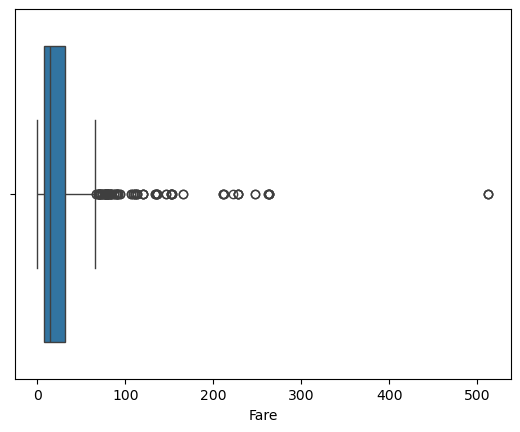

In [25]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x='Fare',data=df) 

In [19]:
df 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='SibSp'>

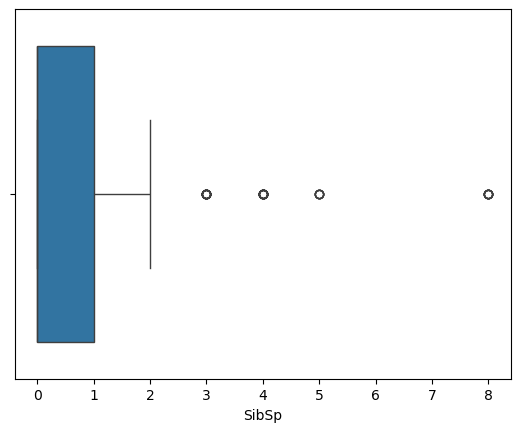

In [20]:
sns.boxplot(x='SibSp',data=df) 

In [21]:
sorted(df['SibSp'].unique()) 

[0, 1, 2, 3, 4, 5, 8]

In [25]:
df['SibSp'].value_counts() 

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

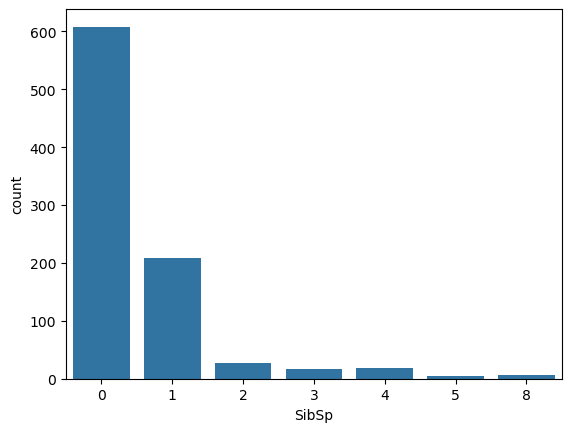

In [26]:
sns.countplot(x='SibSp',data=df) 

In [27]:
df[df['SibSp']>2].shape 

(46, 12)

In [28]:
df[df['Fare']>200].shape 

(20, 12)

In [29]:
df = df[~(df['Fare']>200)] 

In [27]:
df.Embarked.unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
df.Embarked.isna().sum()

2

In [29]:
df.Embarked.value_counts() 

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [32]:
df.Embarked = df.Embarked.fillna('S') 

In [31]:
df.Embarked.unique()  

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df['Gender']=df['Gender'].replace('male',0).replace('female',1)  

In [35]:
df.Gender.unique() 

array([0, 1], dtype=int64)

In [37]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [41]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [43]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True) 

In [45]:
df.Age = df.Age.fillna(df.Age.mean()) 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [49]:
df = pd.get_dummies(df,prefix=['Embarked'],drop_first=True) 

In [51]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,29.699118,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


In [53]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Gender      891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [55]:
df.corr() 

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.332212,0.542192,-0.080173,-0.023911,0.083943,0.255108,0.009719,-0.156274
Pclass,-0.332212,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.221009,0.081720
Gender,0.542192,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.074115,-0.125722
Age,-0.080173,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.013855,-0.027121
SibSp,-0.023911,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.026354,0.070941
Parch,0.083943,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.081228,0.063036
Fare,0.255108,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.117216,-0.166603
Embarked_Q,0.009719,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,1.000000,-0.496624
Embarked_S,-0.156274,0.081720,-0.125722,-0.027121,0.070941,0.063036,-0.166603,-0.496624,1.000000


# Building Model

## splitting the data

In [57]:
x = df.drop('Survived',axis=1)
y = df.Survived  

In [59]:
x

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,38.000000,1,0,71.2833,False,False
2,3,1,26.000000,0,0,7.9250,False,True
3,1,1,35.000000,1,0,53.1000,False,True
4,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,False,True
887,1,1,19.000000,0,0,30.0000,False,True
888,3,1,29.699118,1,2,23.4500,False,True
889,1,0,26.000000,0,0,30.0000,False,False


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


## creating an instance of the model

In [63]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)   

LogisticRegression()

## predicting the values

In [65]:
y_pred = Log_Reg.predict(x_test)
y_pred  

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [67]:
y_test  

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

# Model Evaluation

In [54]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[96, 11],
       [23, 45]], dtype=int64)

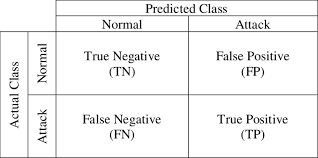

In [ ]:
      Predicted
    0         1
   TN        FP      0      Actual
   FN        TP      1

In [50]:
# Precision >> Tp/Tp+Fp

45/(45+11)

0.8035714285714286

In [51]:
precision_score(y_test,y_pred)

0.8035714285714286

In [52]:
# Recall >> Tp/(Tp+Fn)
45/(45+23)

0.6617647058823529

In [53]:
recall_score(y_test,y_pred)

0.6617647058823529

In [54]:
# accuracy >> Tp+Tn/Tp+Tn+Fp+Fn

(45+96)/(45+96+11+23)

0.8057142857142857

In [55]:
accuracy_score(y_test,y_pred)

0.8057142857142857

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.80      0.66      0.73        68

    accuracy                           0.81       175
   macro avg       0.81      0.78      0.79       175
weighted avg       0.81      0.81      0.80       175



In [59]:
y_pred_prob = Log_Reg.predict_proba(x_test)
y_pred_prob

array([[0.4060514 , 0.5939486 ],
       [0.3700463 , 0.6299537 ],
       [0.68026153, 0.31973847],
       [0.93717526, 0.06282474],
       [0.89873686, 0.10126314],
       [0.69644793, 0.30355207],
       [0.86461078, 0.13538922],
       [0.78762247, 0.21237753],
       [0.9067253 , 0.0932747 ],
       [0.05908506, 0.94091494],
       [0.82478263, 0.17521737],
       [0.53902442, 0.46097558],
       [0.13320412, 0.86679588],
       [0.80256159, 0.19743841],
       [0.20048953, 0.79951047],
       [0.67470516, 0.32529484],
       [0.8530356 , 0.1469644 ],
       [0.81348064, 0.18651936],
       [0.73338473, 0.26661527],
       [0.22951083, 0.77048917],
       [0.38540814, 0.61459186],
       [0.19719552, 0.80280448],
       [0.92569518, 0.07430482],
       [0.27538595, 0.72461405],
       [0.89331393, 0.10668607],
       [0.85806349, 0.14193651],
       [0.73389251, 0.26610749],
       [0.43193518, 0.56806482],
       [0.20150541, 0.79849459],
       [0.90857797, 0.09142203],
       [0.

In [70]:
# dfx= pd.DataFrame(y_pred_prob)
# dfx[dfx[1]>0.7]

In [74]:
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7794804837822978

In [78]:
fpr,tpr,thresold= roc_curve(y_test,y_pred)
print(fpr,tpr,thresold,sep='\n') 

[0.         0.10280374 1.        ]
[0.         0.66176471 1.        ]
[2 1 0]


## Roc Auc Curve

Text(0, 0.5, 'True Positive Rate')

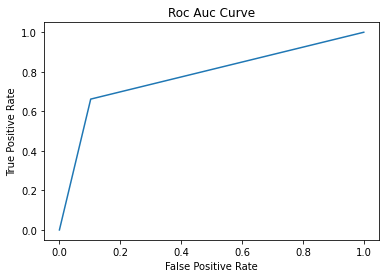

In [79]:
plt.title('Roc Auc Curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
